# Neue Aufteilung der Zeiträume und Normalisierung

In [1]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
# großes DF einlesen 

df_bigger = pd.read_csv('Korpus/corpus_final.csv', sep=',', encoding='utf-8')

In [3]:
df_bigger.head()

,doc,source,author,title,year,period,text_type,text,words,lemmatized_text,cleaned_tokenized_text
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0,iv . 4 . rima del arcadi : aglauro cidonia ( f...,"[['iv'], [], ['rima', 'arcadi', 'aglauro', 'ci..."
1,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0,"﻿iv . 4 . Ludovico Antonio muratori , antichit...","[['iv'], [], ['ludovico', 'antonio', 'muratori..."
2,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0,"iv . 5 . Lorenzo magalotti , lettere odoroso (...","[['iv'], [], ['lorenzo', 'magalotti', 'lettere..."
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0,[ proemio ] \n prendere a scrivere il mio vita...,"[['proemio', 'prendere', 'scrivere', 'vita', '..."
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0,"iv . 4 . Vincenzo da filicaia , lettere inedit...","[['iv'], [], ['vincenzo', 'filicaia', 'lettere..."


In [4]:
df_bigger.shape

(710840, 11)

In [5]:
df_bigger.drop(['period'], axis=1)

,doc,source,author,title,year,text_type,text,words,lemmatized_text,cleaned_tokenized_text
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0,iv . 4 . rima del arcadi : aglauro cidonia ( f...,"[['iv'], [], ['rima', 'arcadi', 'aglauro', 'ci..."
1,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0,"﻿iv . 4 . Ludovico Antonio muratori , antichit...","[['iv'], [], ['ludovico', 'antonio', 'muratori..."
2,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0,"iv . 5 . Lorenzo magalotti , lettere odoroso (...","[['iv'], [], ['lorenzo', 'magalotti', 'lettere..."
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0,[ proemio ] \n prendere a scrivere il mio vita...,"[['proemio', 'prendere', 'scrivere', 'vita', '..."
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0,"iv . 4 . Vincenzo da filicaia , lettere inedit...","[['iv'], [], ['vincenzo', 'filicaia', 'lettere..."
...,...,...,...,...,...,...,...,...,...,...
710835,ita_newscrawl_2020_1M-sentences.txt,Corpora Italian,https://www.laprovinciadisondrio.it/stories/ap...,https://www.laprovinciadisondrio.it/stories/ap...,2020.0,stampa,"Palla nell'angolino basso, Fulignati ci arriva...",11.0,"palla nell' angolino basso , fulignati ci arri...","[['palla', 'angolino', 'basso', 'fulignati', '..."
710836,ita_newscrawl_2020_1M-sentences.txt,Corpora Italian,https://www.laprovinciadisondrio.it/stories/ap...,https://www.laprovinciadisondrio.it/stories/ap...,2020.0,stampa,E questa considerazione vale anche per Carlo A...,16.0,e questo considerazione valere anche per Carlo...,"[['considerazione', 'valere', 'carlo', 'ancelo..."
710837,ita_newscrawl_2019_1M-sentences.txt,Corpora Italian,https://roma.repubblica.it/cronaca/2018/10/12/...,https://roma.repubblica.it/cronaca/2018/10/12/...,2019.0,stampa,Invariato invece il rendimento dei Btp a sette...,25.0,invariato invece il rendimento del Btp a sette...,"[['invariato', 'invece', 'rendimento', 'btp', ..."
710838,ita_news_2020_1M-sentences.txt,Corpora Italian,http://www.milanotoday.it/attualita/coronaviru...,http://www.milanotoday.it/attualita/coronaviru...,2020.0,stampa,Cosa sarà successo tra loro per mettere fine a...,14.0,cosa essere succedere tra loro per mettere fin...,"[['cosa', 'essere', 'succedere', 'mettere', 'f..."


In [6]:
# neue Zeiträume zuordnen

df_bigger['period'] = ['1700-1750' if x >= 1700 and x <= 1750 
                    else '1751-1800' if x >= 1751 and x <= 1800
                    else '1801-1820' if x >= 1801 and x <= 1820
                    else '1821-1840' if x >= 1821 and x <= 1840
                    else '1841-1860' if x >= 1841 and x <= 1860
                    else '1861-1880' if x >= 1861 and x <= 1880
                    else '1881-1900' if x >= 1881 and x <= 1900
                    else '1901-1920' if x >= 1901 and x <= 1920
                    else '1921-1940' if x >= 1921 and x <= 1940
                    else '1941-1960' if x >= 1941 and x <= 1960
                    else '1961-1980' if x >= 1961 and x <= 1980
                    else '1981-2000' if x >= 1981 and x <= 2000
                    else '2001-2021' if x >= 2001 and x <= 2021
                    else '>1700'                                         # alle fehlerhaften Jahreszahlen wären dann das hier
                    for x in pd.to_numeric(df_bigger['year'])]

In [7]:
df_bigger.head()

,doc,source,author,title,year,period,text_type,text,words,lemmatized_text,cleaned_tokenized_text
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0,iv . 4 . rima del arcadi : aglauro cidonia ( f...,"[['iv'], [], ['rima', 'arcadi', 'aglauro', 'ci..."
1,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0,"﻿iv . 4 . Ludovico Antonio muratori , antichit...","[['iv'], [], ['ludovico', 'antonio', 'muratori..."
2,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0,"iv . 5 . Lorenzo magalotti , lettere odoroso (...","[['iv'], [], ['lorenzo', 'magalotti', 'lettere..."
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0,[ proemio ] \n prendere a scrivere il mio vita...,"[['proemio', 'prendere', 'scrivere', 'vita', '..."
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0,"iv . 4 . Vincenzo da filicaia , lettere inedit...","[['iv'], [], ['vincenzo', 'filicaia', 'lettere..."


### Anzahl der Texte pro Zeitraum

In [9]:
periods = list(df_bigger['period'].unique())
per_len ={i: len(df_bigger[df_bigger['period']==i]) for i in periods}
per_len

{'1700-1750': 4636,
 '1751-1800': 2843,
 '1801-1820': 1058,
 '1821-1840': 5948,
 '1841-1860': 4061,
 '1861-1880': 15937,
 '1881-1900': 27378,
 '1901-1920': 20352,
 '1921-1940': 11510,
 '1941-1960': 1400,
 '1961-1980': 723,
 '1981-2000': 99994,
 '2001-2021': 515000}

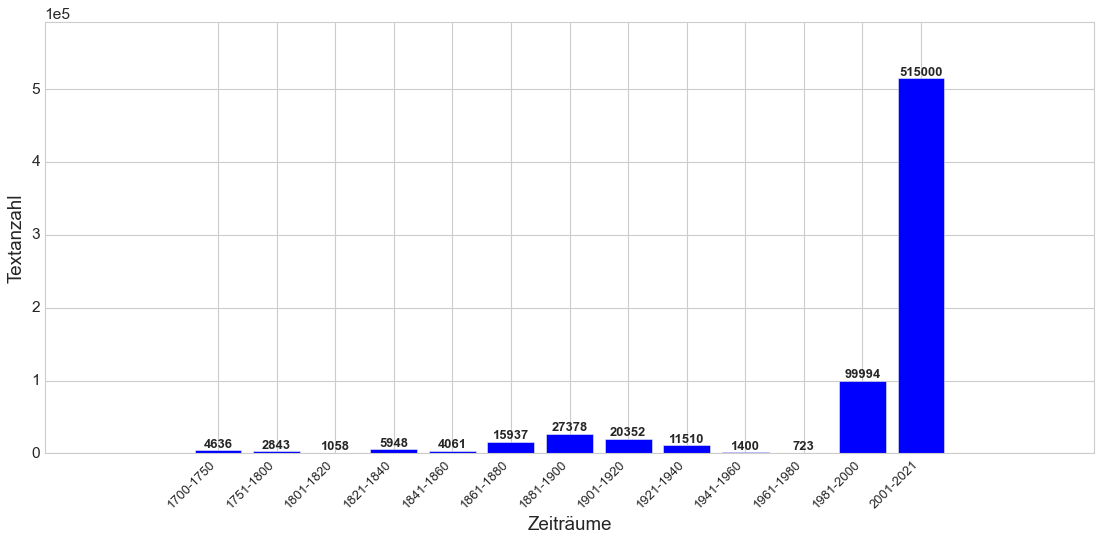

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, per_len.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/new_corpusbig_textanzahl.png')

plt.show()

### Anzahl der Tokens pro Zeitraum

In [15]:
sum_words = {i: math.trunc(sum(df_bigger[df_bigger['period']==i].words)) for i in periods}
sum_words

{'1700-1750': 2086636,
 '1751-1800': 2603417,
 '1801-1820': 1858865,
 '1821-1840': 1431357,
 '1841-1860': 3714703,
 '1861-1880': 3149314,
 '1881-1900': 3602286,
 '1901-1920': 2714037,
 '1921-1940': 2019428,
 '1941-1960': 1516685,
 '1961-1980': 776011,
 '1981-2000': 4377009,
 '2001-2021': 13220437}

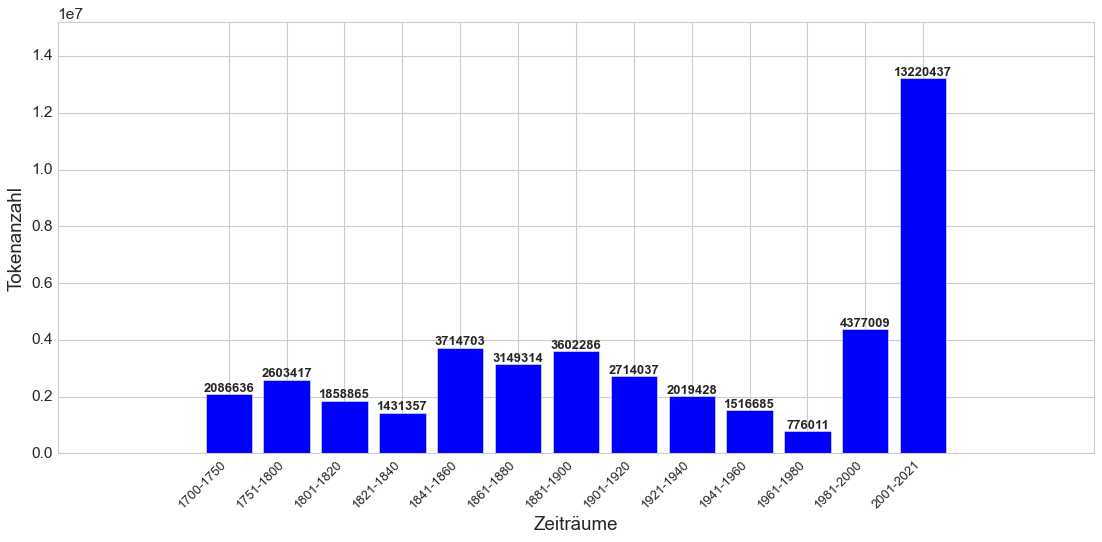

In [16]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words))
plt.bar(x_indexes, sum_words.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/new_corpusbig_tokenanzahl.png')
        
plt.show()

### Durchschnittslänge der Texte pro Zeitraum

In [17]:
# gerundet auf 1 Nachkommastelle

mean_words = {i: round(df_bigger[df_bigger['period']==i].words.mean(), 1) for i in periods}
mean_words

{'1700-1750': 450.1,
 '1751-1800': 915.7,
 '1801-1820': 1757.0,
 '1821-1840': 240.6,
 '1841-1860': 914.7,
 '1861-1880': 197.6,
 '1881-1900': 131.6,
 '1901-1920': 133.4,
 '1921-1940': 175.4,
 '1941-1960': 1083.3,
 '1961-1980': 1073.3,
 '1981-2000': 43.8,
 '2001-2021': 25.7}

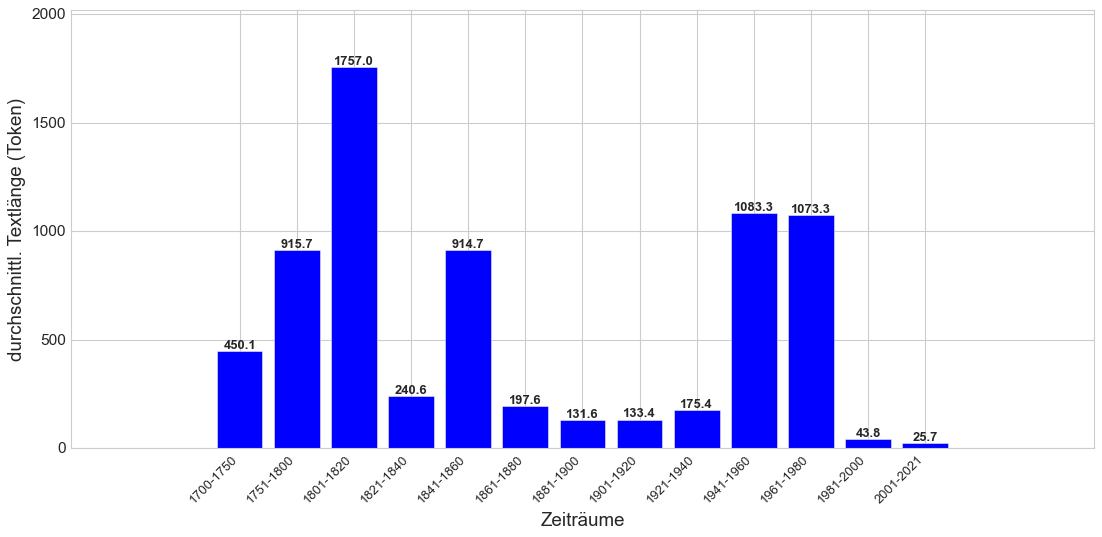

In [18]:
# Verteilung der durchschnittlichen Textlänge auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods))
plt.bar(x_indexes, mean_words.values(), label='Textlänge', width=0.8, color='b')
plt.xticks(ticks=x_indexes, labels=mean_words.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('durchschnittl. Textlänge (Token)')

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, mean_words.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/new_corpusbig_durchschn_tokenanzahl.png')
plt.show()

## Normalisierung

In [19]:
# künstliche Vergrößerung des Korpus durch Reduplizierung
# Ziel: ca. 4 Mio 

p1 = df_bigger[df_bigger['period']=='1700-1750']
p2 = df_bigger[df_bigger['period']=='1751-1800']
p22 = df_bigger[df_bigger['period']=='1751-1800'].sample(n=1300 , random_state=1)
p3 = df_bigger[df_bigger['period']=='1801-1820']
p33 = df_bigger[df_bigger['period']=='1801-1820'].sample(n=200 , random_state=1)
p4 = df_bigger[df_bigger['period']=='1821-1840']
p44 = df_bigger[df_bigger['period']=='1821-1840'].sample(n=5200 , random_state=1)
p5 = df_bigger[df_bigger['period']=='1841-1860']
p55 = df_bigger[df_bigger['period']=='1841-1860'].sample(n=271 , random_state=1)
p6 = df_bigger[df_bigger['period']=='1861-1880']
p66 = df_bigger[df_bigger['period']=='1861-1880'].sample(n=4200 , random_state=1)
p7 = df_bigger[df_bigger['period']=='1881-1900']
p77 = df_bigger[df_bigger['period']=='1881-1900'].sample(n=2700 , random_state=1)
p8 = df_bigger[df_bigger['period']=='1901-1920']
p88 = df_bigger[df_bigger['period']=='1901-1920'].sample(n=6600 , random_state=1)
p9 = df_bigger[df_bigger['period']=='1921-1940']
p10 = df_bigger[df_bigger['period']=='1941-1960']
p1010 = df_bigger[df_bigger['period']=='1941-1960'].sample(n=1000 , random_state=1)
p11 = df_bigger[df_bigger['period']=='1961-1980']
p1111 = df_bigger[df_bigger['period']=='1961-1980'].sample(n=270 , random_state=1)
p12 = df_bigger[df_bigger['period']=='1981-2000'].sample(n=93000 , random_state=1)
p13 = df_bigger[df_bigger['period']=='2001-2021'].sample(n=160000 , random_state=1)

# Zusammenfügen der Zeiträume und Samples zu einem neuen Dataframe
df_norm = pd.concat([p1, p1, p2, p22, p3, p3, p33, p4, p4, p44, p5, p55, p6, p66, p7, p77, p8, p88, 
                     p9, p9, p10, p10, p1010, p11, p11, p11, p11, p11, p1111, p12, p13])

In [20]:
df_norm.head()

,doc,source,author,title,year,period,text_type,text,words,lemmatized_text,cleaned_tokenized_text
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0,iv . 4 . rima del arcadi : aglauro cidonia ( f...,"[['iv'], [], ['rima', 'arcadi', 'aglauro', 'ci..."
1,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0,"﻿iv . 4 . Ludovico Antonio muratori , antichit...","[['iv'], [], ['ludovico', 'antonio', 'muratori..."
2,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0,"iv . 5 . Lorenzo magalotti , lettere odoroso (...","[['iv'], [], ['lorenzo', 'magalotti', 'lettere..."
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0,[ proemio ] \n prendere a scrivere il mio vita...,"[['proemio', 'prendere', 'scrivere', 'vita', '..."
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0,"iv . 4 . Vincenzo da filicaia , lettere inedit...","[['iv'], [], ['vincenzo', 'filicaia', 'lettere..."


In [21]:
df_norm.shape

(398031, 11)

### Anzahl der Texte pro Zeitraum

In [22]:
periods_norm = list(df_norm['period'].unique())
per_len_norm ={i: len(df_norm[df_norm['period']==i]) for i in periods_norm }
per_len_norm

{'1700-1750': 9272,
 '1751-1800': 4143,
 '1801-1820': 2316,
 '1821-1840': 17096,
 '1841-1860': 4332,
 '1861-1880': 20137,
 '1881-1900': 30078,
 '1901-1920': 26952,
 '1921-1940': 23020,
 '1941-1960': 3800,
 '1961-1980': 3885,
 '1981-2000': 93000,
 '2001-2021': 160000}

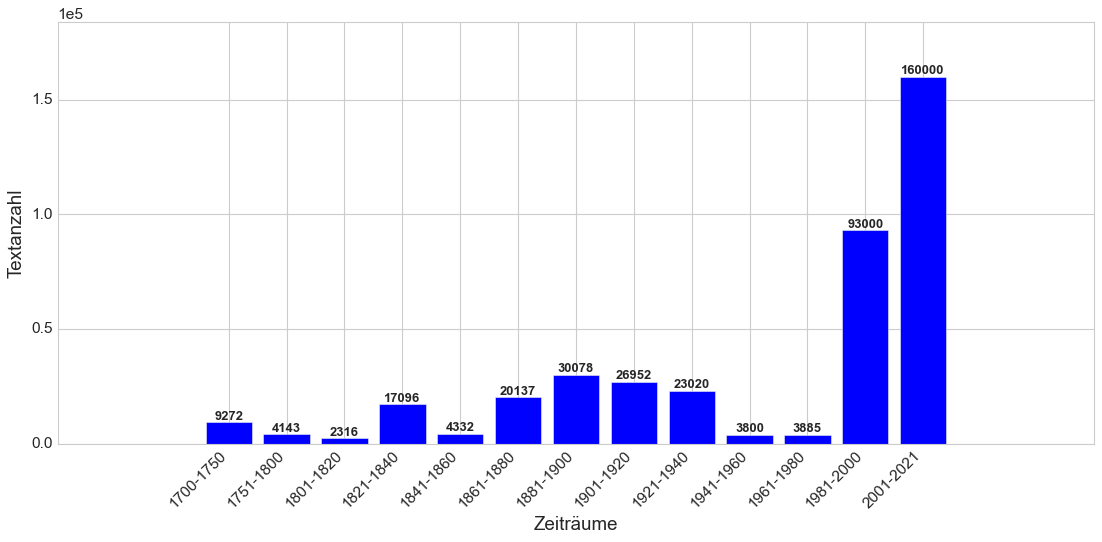

In [23]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods_norm))
plt.bar(x_indexes, per_len_norm.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len_norm.keys(), rotation=45, horizontalalignment='right')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/new_corpusnorm_textanzahl.png')
plt.show()

### Anzahl der Tokens pro Zeitraum

In [24]:
sum_words_norm = {i: math.trunc(sum(df_norm[df_norm['period']==i].words)) for i in periods_norm}
sum_words_norm

{'1700-1750': 4173272,
 '1751-1800': 4172286,
 '1801-1820': 4053489,
 '1821-1840': 4083010,
 '1841-1860': 4230694,
 '1861-1880': 4022747,
 '1881-1900': 4173182,
 '1901-1920': 4003213,
 '1921-1940': 4038856,
 '1941-1960': 4022508,
 '1961-1980': 4121560,
 '1981-2000': 4013579,
 '2001-2021': 4134674}

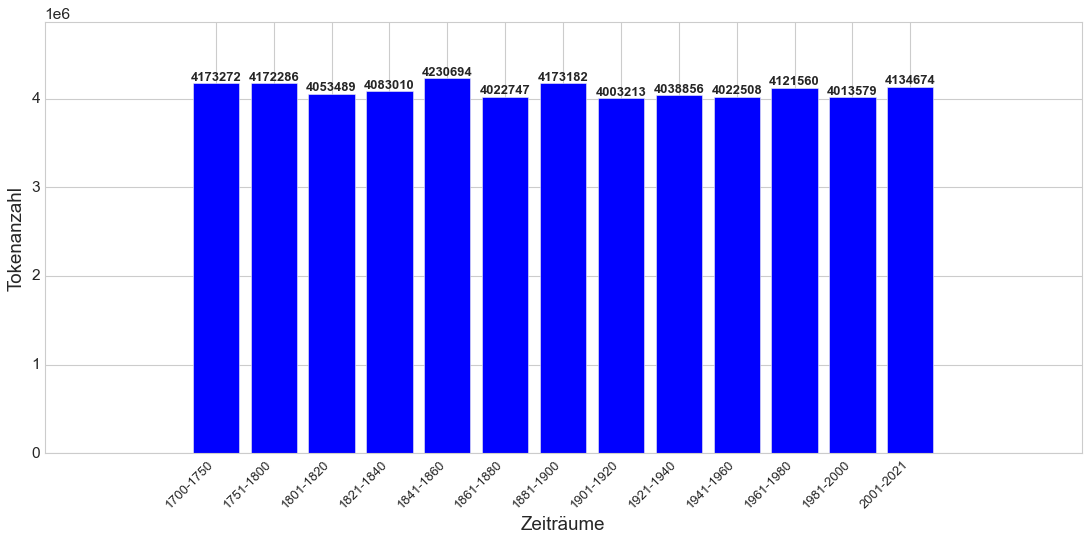

In [25]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words_norm))
plt.bar(x_indexes, sum_words_norm.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words_norm.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/new_corpusnorm_tokenanzahl.png')
plt.show()

### Verteilung der Texttypen auf die Zeiträume

In [26]:
period_frames = []

In [27]:
# Teilframes pro Zeitraum erstellen

df_periods = dict(tuple(df_norm.groupby(by='period')))

for df, period in zip(df_periods, periods_norm):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [28]:
periods_texttypes = {}

In [29]:
# Anzahl der Texte pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    texttypes = df.groupby(by='text_type')
    types = texttypes.groups
    
    periods_texttypes[period] = {key : len(value) for key, value in types.items()}

In [30]:
periods_texttypes

{'1700-1750': {'espositivo': 30,
  'personale': 38,
  'poesia': 26,
  'prosa letteraria': 9128,
  'teatro': 50},
 '1751-1800': {'espositivo': 52,
  'personale': 26,
  'poesia': 32,
  'prosa letteraria': 3973,
  'teatro': 60},
 '1801-1820': {'espositivo': 116,
  'personale': 42,
  'poesia': 66,
  'prosa letteraria': 2079,
  'teatro': 13},
 '1821-1840': {'espositivo': 63,
  'personale': 37,
  'poesia': 23,
  'prosa letteraria': 16961,
  'teatro': 12},
 '1841-1860': {'espositivo': 32,
  'personale': 12,
  'poesia': 6,
  'prosa letteraria': 4278,
  'teatro': 4},
 '1861-1880': {'espositivo': 22,
  'personale': 9,
  'poesia': 11,
  'prosa letteraria': 20085,
  'stampa': 5,
  'teatro': 5},
 '1881-1900': {'espositivo': 16,
  'personale': 4,
  'poesia': 12,
  'prosa letteraria': 30025,
  'stampa': 9,
  'teatro': 12},
 '1901-1920': {'espositivo': 32,
  'personale': 6,
  'poesia': 14,
  'prosa letteraria': 26878,
  'stampa': 14,
  'teatro': 8},
 '1921-1940': {'espositivo': 50,
  'personale': 10,


In [31]:
periods_texttypes_token = {}

In [32]:
# Anzahl der Tokens pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    words = {i: math.trunc(sum(df[df['text_type']==i].words)) for i in list(df['text_type'].unique())}
    periods_texttypes_token[period] = words

In [33]:
periods_texttypes_token

{'1700-1750': {'poesia': 1025144,
  'espositivo': 1755724,
  'personale': 472330,
  'prosa letteraria': 417320,
  'teatro': 502754},
 '1751-1800': {'personale': 725362,
  'espositivo': 2245958,
  'teatro': 626602,
  'poesia': 308844,
  'prosa letteraria': 265520},
 '1801-1820': {'espositivo': 1225895,
  'poesia': 371712,
  'personale': 1939483,
  'teatro': 146147,
  'prosa letteraria': 370252},
 '1821-1840': {'poesia': 350627,
  'teatro': 84532,
  'prosa letteraria': 1785818,
  'espositivo': 1190761,
  'personale': 671272},
 '1841-1860': {'prosa letteraria': 1028929,
  'poesia': 176292,
  'espositivo': 2027350,
  'teatro': 27030,
  'personale': 971093},
 '1861-1880': {'prosa letteraria': 2589354,
  'espositivo': 1128401,
  'poesia': 81894,
  'personale': 171199,
  'teatro': 51125,
  'stampa': 774},
 '1881-1900': {'prosa letteraria': 3604717,
  'teatro': 92755,
  'stampa': 4176,
  'espositivo': 319174,
  'poesia': 113516,
  'personale': 38844},
 '1901-1920': {'prosa letteraria': 3003290

In [34]:
espositivo = []
dialogo = []
poesia = []
personale = []
prosa_lett = []
stampa = []
teatro = []
web = []

In [35]:
# Werte des Texttyps rausziehen und in Liste speichern 

for i in periods_texttypes_token:
    
    esp = periods_texttypes_token.get(i, {}).get('espositivo')
    espositivo.append(esp)
    
    di = periods_texttypes_token.get(i, {}).get('dialogo')
    dialogo.append(di)
    
    po = periods_texttypes_token.get(i, {}).get('poesia')
    poesia.append(po)
    
    per = periods_texttypes_token.get(i, {}).get('personale')
    personale.append(per)
    
    prolet = periods_texttypes_token.get(i, {}).get('prosa letteraria')
    prosa_lett.append(prolet)
    
    st = periods_texttypes_token.get(i, {}).get('stampa')
    stampa.append(st)
    
    tea = periods_texttypes_token.get(i, {}).get('teatro')
    teatro.append(tea)
    
    w = periods_texttypes_token.get(i, {}).get('web')
    web.append(w)

In [36]:
# None mit 0 ersetzen

espositivo = [0 if v is None else v for v in espositivo]
dialogo = [0 if v is None else v for v in dialogo]
poesia = [0 if v is None else v for v in poesia]
personale = [0 if v is None else v for v in personale]
prosa_lett = [0 if v is None else v for v in prosa_lett]
stampa = [0 if v is None else v for v in stampa]
teatro = [0 if v is None else v for v in teatro]
web = [0 if v is None else v for v in web]

In [37]:
print(espositivo)
print(dialogo)
print(personale)
print(poesia)
print(prosa_lett)
print(stampa)
print(teatro)
print(web)

[1755724, 2245958, 1225895, 1190761, 2027350, 1128401, 319174, 624312, 1229434, 201411, 423627, 787, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78907, 0, 0]
[472330, 725362, 1939483, 671272, 971093, 171199, 38844, 167571, 426798, 27807, 0, 0, 0]
[1025144, 308844, 371712, 350627, 176292, 81894, 113516, 142085, 63522, 0, 0, 0, 0]
[417320, 265520, 370252, 1785818, 1028929, 2589354, 3604717, 3003290, 2200044, 2717960, 1313271, 12483, 20242]
[0, 0, 0, 0, 0, 774, 4176, 2067, 5808, 1075330, 2305755, 4000309, 2498897]
[502754, 626602, 146147, 84532, 27030, 51125, 92755, 63888, 113250, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1615535]


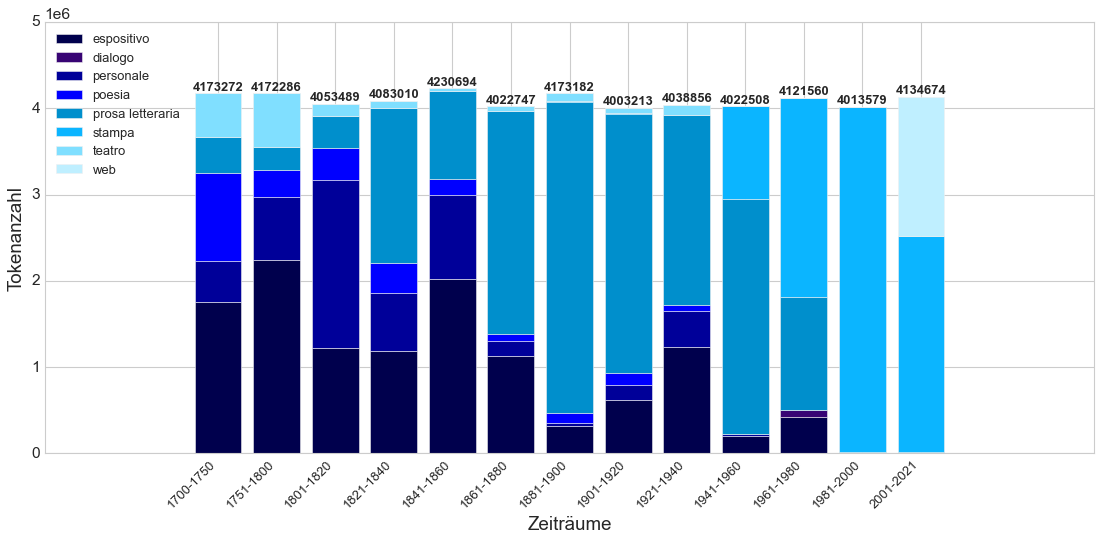

In [38]:
# Verteilung der Texttypen auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

data = np.array([espositivo, dialogo, personale, poesia, prosa_lett, stampa, teatro, web])
labels = ['espositivo', 'dialogo', 'personale', 'poesia', 'prosa letteraria', 'stampa', 'teatro', 'web']
colors = ['#00004d','#380474', '#000099', '#0000FF', '#008fcc', '#0BB5FF', '#80dfff', '#BFEFFF']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    plt.bar(X, data[i],bottom = np.sum(data[:i], axis=0),label=labels[i % len(labels)], color=colors[i % len(colors)])

x_indexes = np.arange(len(periods_norm))
plt.xticks(ticks=x_indexes, labels=periods_norm, rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 5000000)
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.margins(0.2, 0.2)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/new_corpusnorm_tokenanzahl_texttypes.png')
plt.show()

In [210]:
# normalisiertes Korpus speichern

df_norm.to_csv('Korpus/corpus_new.csv', encoding='utf-8', index=False)

### Kandidaten im normalisierten, lemmatisierten Korpus

In [211]:
# wieder einlesen 

df = pd.read_csv('Korpus/corpus_new.csv', sep=',', encoding='utf-8')

In [212]:
df.head()

,doc,source,author,title,year,period,text_type,text,words,lemmatized_text,cleaned_tokenized_text
0,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0,iv . 4 . rima del arcadi : aglauro cidonia ( f...,"[['iv'], [], ['rima', 'arcadi', 'aglauro', 'ci..."
1,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0,"﻿iv . 4 . Ludovico Antonio muratori , antichit...","[['iv'], [], ['ludovico', 'antonio', 'muratori..."
2,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0,"iv . 5 . Lorenzo magalotti , lettere odoroso (...","[['iv'], [], ['lorenzo', 'magalotti', 'lettere..."
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0,[ proemio ] \n prendere a scrivere il mio vita...,"[['proemio', 'prendere', 'scrivere', 'vita', '..."
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0,"iv . 4 . Vincenzo da filicaia , lettere inedit...","[['iv'], [], ['vincenzo', 'filicaia', 'lettere..."


In [213]:
df.shape

(398031, 11)

In [214]:
df.text = df.text.fillna('')
df.lemmatized_text = df.lemmatized_text.fillna('')

In [215]:
# Teilframes pro Zeitraum erstellen

period_frames = []
periods = list(df['period'].unique())
df_periods = dict(tuple(df.groupby(by='period')))

for df, period in zip(df_periods, periods):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [216]:
# Funktion, die bestimmte Wörter zählt

def count_keywords(df, keywords):
    keyword_dict = {w:w.replace(' ', '_') for w in keywords}

    corpus = ' '.join(df.lemmatized_text).lower()                      # im lemmatisierten Text
    for w,w2 in keyword_dict.items():
        corpus = corpus.replace(w,w2)

    all_counts = Counter(corpus.split())
    final_counts = {w:all_counts[w2] for w,w2 in keyword_dict.items()}
    return final_counts

In [217]:
# mögliche Kandidaten

keywords = ['atrocemente', 'formidabilmente', 'mostruosamente', 'orrendamente', 
            'orribilmente', 'spaventosamente', 'terribilmente', 'tremendamente', 
            'molto', 'angoscia', 'angosciare', 'ansia', 'atterrire', 'panico', 
            'paura', 'raccapricciare', 'raccapriccio', 'schifo', 'sgomentare', 
            'sgomento', 'spaventare', 'spavento', 'terrore', 'domani', 'finora', 
            'ieri', 'oggi', 'presto', 'raramente', 'sempre', 'spesso']

In [218]:
candidates = {}

for df, period in zip(period_frames, periods):
    res = count_keywords(df, keywords)
    candidates[period] = res

In [219]:
candidates

{'1700-1750': {'atrocemente': 4,
  'formidabilmente': 0,
  'mostruosamente': 4,
  'orrendamente': 2,
  'orribilmente': 40,
  'spaventosamente': 18,
  'terribilmente': 26,
  'tremendamente': 0,
  'molto': 22430,
  'angoscia': 50,
  'angosciare': 0,
  'ansia': 2,
  'atterrire': 404,
  'panico': 44,
  'paura': 1166,
  'raccapricciare': 14,
  'raccapriccio': 2,
  'schifo': 22,
  'sgomentare': 122,
  'sgomento': 14,
  'spaventare': 272,
  'spavento': 782,
  'terrore': 1194,
  'domani': 112,
  'finora': 888,
  'ieri': 50,
  'oggi': 1826,
  'presto': 1018,
  'raramente': 18,
  'sempre': 4538,
  'spesso': 1628},
 '1751-1800': {'atrocemente': 5,
  'formidabilmente': 0,
  'mostruosamente': 0,
  'orrendamente': 1,
  'orribilmente': 37,
  'spaventosamente': 2,
  'terribilmente': 22,
  'tremendamente': 0,
  'molto': 25804,
  'angoscia': 179,
  'angosciare': 0,
  'ansia': 2,
  'atterrire': 191,
  'panico': 18,
  'paura': 425,
  'raccapricciare': 4,
  'raccapriccio': 15,
  'schifo': 42,
  'sgomentare

In [220]:
table = pd.DataFrame.from_dict(candidates, orient='index')
table

,atrocemente,formidabilmente,mostruosamente,orrendamente,orribilmente,spaventosamente,terribilmente,tremendamente,molto,angoscia,...,spavento,terrore,domani,finora,ieri,oggi,presto,raramente,sempre,spesso
1700-1750,4,0,4,2,40,18,26,0,22430,50,...,782,1194,112,888,50,1826,1018,18,4538,1628
1751-1800,5,0,0,1,37,2,22,0,25804,179,...,316,883,350,409,199,1048,1476,130,5302,2114
1801-1820,4,0,2,23,58,5,18,4,21881,245,...,295,582,612,210,872,2809,1173,59,6411,1633
1821-1840,51,0,3,11,123,5,86,0,24337,552,...,1681,3427,643,611,479,1801,1688,47,6133,2735
1841-1860,14,3,5,7,60,2,42,8,16771,322,...,331,570,560,326,241,1566,1501,72,4865,1382
1861-1880,96,17,18,49,263,43,136,43,21725,1019,...,1082,1957,3040,496,1331,3687,2787,147,5998,2651
1881-1900,104,12,37,33,159,84,209,73,23554,1223,...,1103,1815,4906,886,2681,4778,4020,281,9586,3134
1901-1920,77,20,25,44,210,125,217,31,23865,1349,...,792,1641,5417,792,2200,4833,3612,449,8254,3878
1921-1940,62,12,34,56,252,128,368,52,21930,1598,...,862,2290,4920,566,2324,5008,2530,162,7350,2126
1941-1960,29,6,11,21,33,51,101,32,22773,310,...,189,472,942,168,671,2831,914,141,5358,1715


In [221]:
table.to_csv('Korpus/candidates_new.csv', sep=';')